In [17]:
import h5py

def print_hdf5_structure(file_path):
    def print_group(group, indent=0):
        for key in group.keys():
            item = group[key]
            print("  " * indent + f"{key}: {type(item)}")
            if isinstance(item, h5py.Group):
                print_group(item, indent + 1)
            elif isinstance(item, h5py.Dataset):
                print("  " * (indent + 1) + f"Shape: {item.shape}, Dtype: {item.dtype}")

    with h5py.File(file_path, 'r') as f:
        print_group(f)

if __name__ == "__main__":
    file_path = "/home/user/onolab_ros1/catkin_ws//src/gello_software/gello_ros/scripts/episode_data/20241130_190248_cup_in_and_push/episode_1.hdf5"
    print_hdf5_structure(file_path)

action: <class 'h5py._hl.dataset.Dataset'>
  Shape: (1000, 6), Dtype: float32
observations: <class 'h5py._hl.group.Group'>
  images: <class 'h5py._hl.group.Group'>
    base_rgb: <class 'h5py._hl.dataset.Dataset'>
      Shape: (1000, 480, 640, 3), Dtype: uint8
    side_rgb: <class 'h5py._hl.dataset.Dataset'>
      Shape: (1000, 480, 640, 3), Dtype: uint8
  qpos: <class 'h5py._hl.dataset.Dataset'>
    Shape: (1000, 6), Dtype: float32
  qvel: <class 'h5py._hl.dataset.Dataset'>
    Shape: (1000, 6), Dtype: float32
  wrench: <class 'h5py._hl.dataset.Dataset'>
    Shape: (1000, 6), Dtype: float32


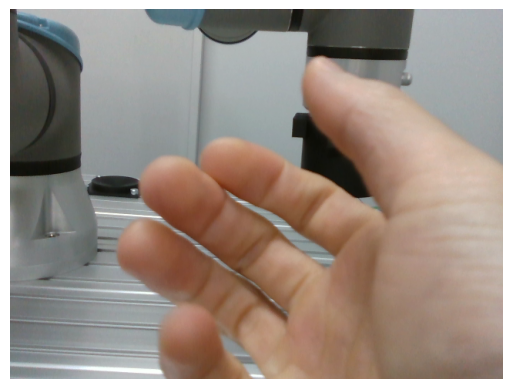

In [18]:
import matplotlib.pyplot as plt

def display_image_from_hdf5(file_path):
    with h5py.File(file_path, 'r') as f:
        # Access the dataset
        image_data = f['observations/images/base_rgb']
        
        # Display the first image in the dataset
        plt.imshow(image_data[500])
        plt.axis('off')  # Hide the axis
        plt.show()

display_image_from_hdf5(file_path)

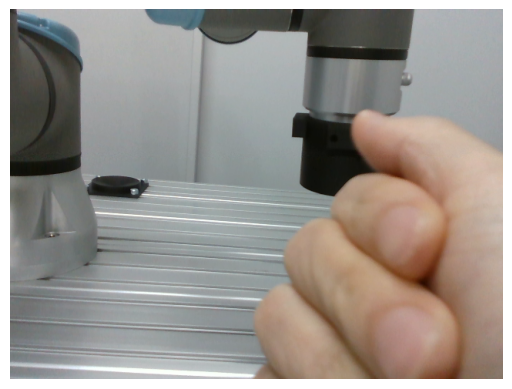

In [25]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def display_video_from_hdf5(file_path, start_index, end_index, interval=50):
    with h5py.File(file_path, 'r') as f:
        # Access the dataset
        image_data = f['observations/images/base_rgb']
        
        # Create a figure and axis for displaying the images
        fig, ax = plt.subplots()
        ax.axis('off')  # Hide the axis
        
        # Create an empty image object to update during animation
        im = ax.imshow(image_data[start_index], animated=True)
        
        # Function to update the frame for the animation
        def update_frame(frame):
            rgb_image = image_data[start_index + frame]
            im.set_array(rgb_image)
            return [im]
        
        # Create the animation
        ani = animation.FuncAnimation(fig, update_frame, frames=end_index - start_index, interval=interval, blit=True)
        
        # Display the animation in Jupyter as HTML
        return HTML(ani.to_jshtml())

# Usage example:
start_index = 7  # Start frame
end_index =  15   # End frame
display_video_from_hdf5(file_path, start_index, end_index)
